In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1.0 Load data

AKI data

In [4]:
# Load data
input_data_qm = pd.read_csv("aki_data/test_qm.csv")
design_matrix = pd.read_csv("aki_data/design_matrix.tsv", sep="\t")

# Preprocess data
input_data_preprocessed = input_data_qm.fillna(0)
input_data = input_data_preprocessed.drop(['Protein'], axis=1)
design_matrix = design_matrix.replace(1, 0)
design_matrix = design_matrix.replace(2, 1)

# Split data into train and test
X_test_aki = input_data.loc[:, ~input_data.columns.str.contains('M2012')].transpose()
X_train_aki = input_data.loc[:, input_data.columns.str.contains('M2012')].transpose()
y_test_aki = design_matrix['group'][~design_matrix['sample'].str.contains('M2012')]
y_train_aki = design_matrix['group'][design_matrix['sample'].str.contains('M2012')]


Covid data

In [5]:
covid_train_X = pd.read_csv('covid_data/covid_train_qm.csv', index_col=0)
covid_test_X = pd.read_csv('covid_data/covid_test_qm.csv', index_col=0)
covid_train_y = pd.read_csv('covid_data/covid_train_design_qm.csv', index_col=0)
covid_test_y = pd.read_csv('covid_data/covid_test_design_qm.csv', index_col=0)

# Reshape data
X_train_covid = covid_train_X.drop(['Protein'], axis=1).transpose()
X_test_covid = covid_test_X.drop(['Protein'], axis=1).transpose()
y_train_covid = covid_train_y['group']
y_test_covid = covid_test_y['group']

## 2.0 Correlation analysis

Heatmap of correlation matrices

/tmp/ipykernel_1053145/1471273386.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


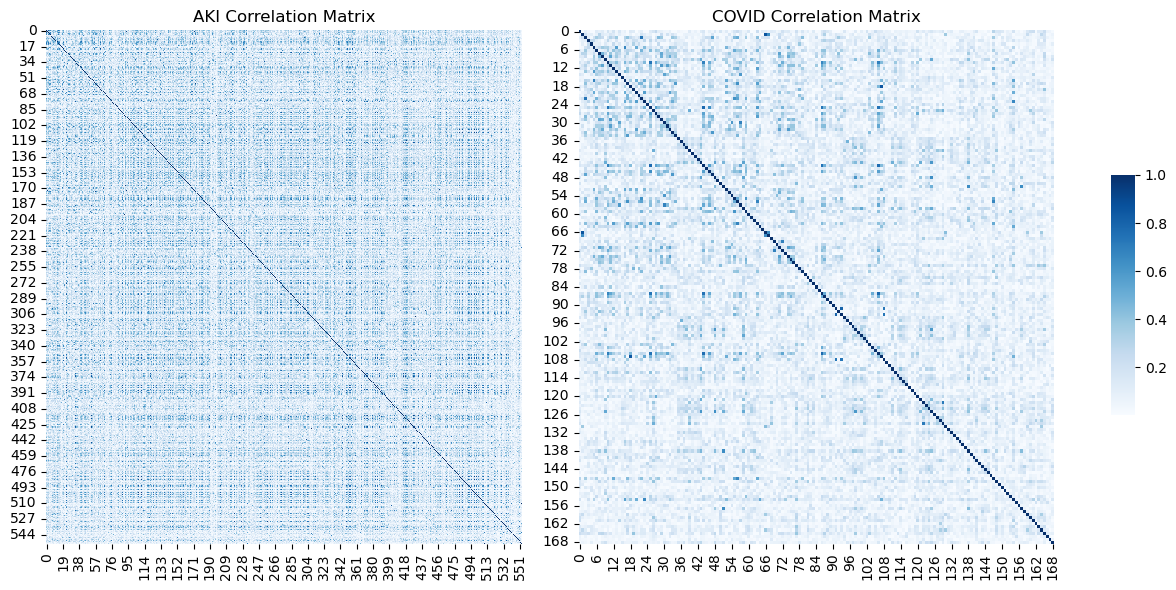

In [7]:
# calculate correlation between features
corr_aki = X_train_aki.corr()
corr_aki_abs = abs(corr_aki)

corr_covid = X_train_covid.corr()
corr_covid_abs = abs(corr_covid)

# plot correlation matrices for AKI and COVID with heatmap, legend, and colorbar
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(corr_aki_abs, ax=ax[0], cmap='Blues', cbar=False)
ax[0].set_title('AKI Correlation Matrix')
sns.heatmap(corr_covid_abs, ax=ax[1], cmap='Blues', cbar_ax=fig.add_axes([0.93, 0.3, 0.02, 0.4]))
ax[1].set_title('COVID Correlation Matrix')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


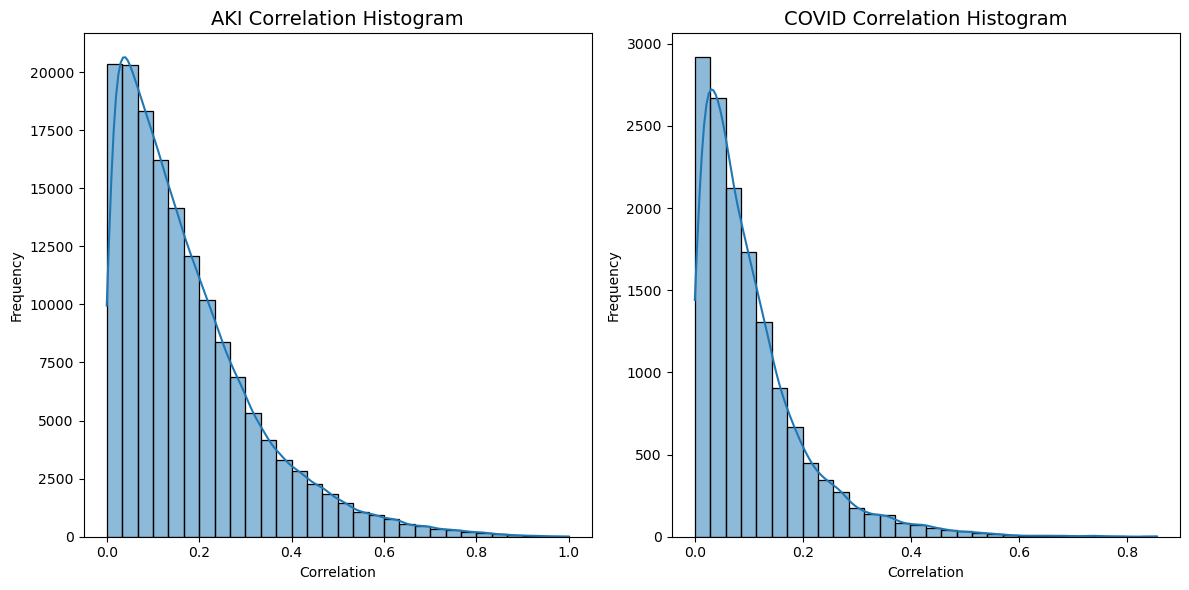

In [23]:
# drop the upper triangle of the correlation matrix
upper_aki = corr_aki_abs.where(np.triu(np.ones(corr_aki_abs.shape), k=1).astype(np.bool_))
upper_covid = corr_covid_abs.where(np.triu(np.ones(corr_covid_abs.shape), k=1).astype(np.bool_))

# stack the columns
stacked_aki = upper_aki.stack().reset_index()
stacked_covid = upper_covid.stack().reset_index()

# rename columns
stacked_aki.columns = ['var1', 'var2', 'correlation']
stacked_covid.columns = ['var1', 'var2', 'correlation']

# remove NaNs
stacked_aki = stacked_aki.dropna()
stacked_covid = stacked_covid.dropna()

# plot histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(stacked_aki['correlation'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('AKI Correlation Histogram', fontsize=14)
ax[0].set_xlabel('Correlation')
ax[0].set_ylabel('Frequency')
sns.histplot(stacked_covid['correlation'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('COVID Correlation Histogram', fontsize=14)
ax[1].set_xlabel('Correlation')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()





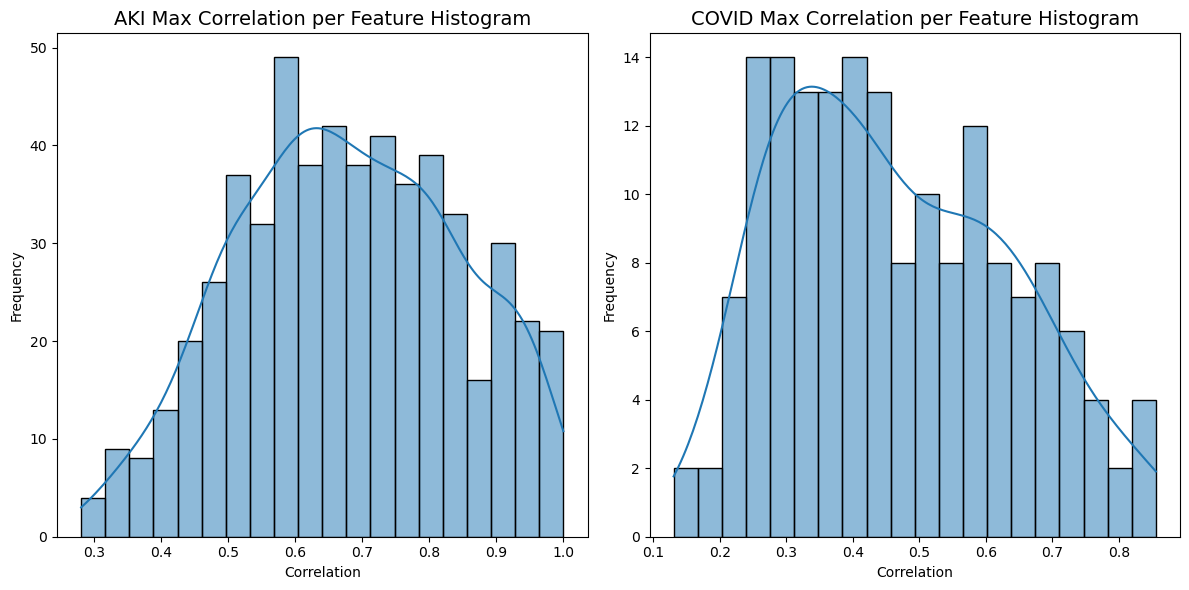

In [25]:
# get correlation matrix without diagonal
corr_aki_without_diag = corr_aki_abs.copy()
np.fill_diagonal(corr_aki_without_diag.values, np.nan)
corr_covid_without_diag = corr_covid_abs.copy()
np.fill_diagonal(corr_covid_without_diag.values, np.nan)

# get max correlation values in each row
max_corr_aki = corr_aki_without_diag.max(axis=1)
max_corr_covid = corr_covid_without_diag.max(axis=1)

# plot histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(max_corr_aki, bins=20, kde=True, ax=ax[0])
ax[0].set_title('AKI Max Correlation per Feature Histogram', fontsize=14)
ax[0].set_xlabel('Correlation')
ax[0].set_ylabel('Frequency')
sns.histplot(max_corr_covid, bins=20, kde=True, ax=ax[1])
ax[1].set_title('COVID Max Correlation per Feature Histogram', fontsize=14)
ax[1].set_xlabel('Correlation')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


